## Collected Validation Accuracies (Runs 1–5)
Extracted from evaluation outputs of each run.

In [3]:
# Validation accuracies (%) for runs 1 through 5
accuracies = [99.82, 99.85, 99.85, 99.70, 99.77]
accuracies

[99.82, 99.85, 99.85, 99.7, 99.77]

## Statistical Summary (Runs 1–5)

In [4]:
import numpy as np, pandas as pd
arr = np.array(accuracies)
mean_val = arr.mean()
pop_std = arr.std(ddof=0)
samp_std = arr.std(ddof=1)
min_val, max_val = arr.min(), arr.max()
range_val = max_val - min_val
cv = pop_std / mean_val
summary = pd.DataFrame({
    'Mean %':[mean_val],
    'Min %':[min_val],
    'Max %':[max_val],
    'Range pp':[range_val],
    'Sample Std pp':[samp_std],
    'Population Std pp':[pop_std],
    'Coeff Variation':[cv]
})
summary

,Mean %,Min %,Max %,Range pp,Sample Std pp,Population Std pp,Coeff Variation
0,99.798,99.7,99.85,0.15,0.063797,0.057061,0.000572


### Distribution Plots (Runs 1–5)

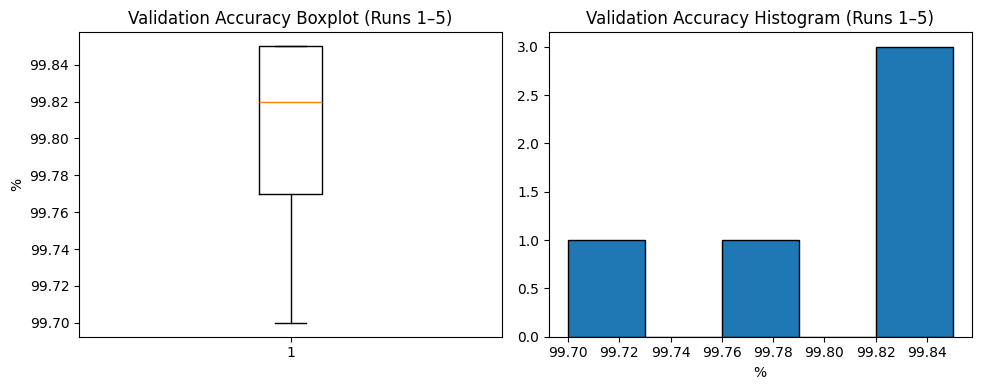

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot(accuracies, vert=True)
plt.title('Validation Accuracy Boxplot (Runs 1–5)')
plt.ylabel('%')
plt.subplot(1,2,2)
plt.hist(accuracies, bins=5, edgecolor='black')
plt.title('Validation Accuracy Histogram (Runs 1–5)')
plt.xlabel('%')
plt.tight_layout()
plt.show()

## Epoch Timing Analysis (Runs 1–5)
Epoch durations (seconds) parsed from training logs for runs 1–5.

In [6]:
epoch_times = {
    'run1':[54,49,52,47,47,52,47,47,47,87],
    'run2':[48,48,52,48,47,52,82,48,52,48],
    'run3':[53,48,52,48,52,78,48,52,47,47],
    'run4':[50,48,83,49,48,48,48,48,52,47],
    'run5':[49,52,48,48,48,49,48,52,48,48],
}
import numpy as np, pandas as pd
rows = []
for run, times in epoch_times.items():
    for i,t in enumerate(times, start=1):
        rows.append({'run': run, 'epoch': i, 'seconds': t})
df = pd.DataFrame(rows)
run_stats = df.groupby('run')['seconds'].agg(['mean','std','min','max'])
all_mean = df['seconds'].mean()
all_median = df['seconds'].median()
all_std = df['seconds'].std()
typical_pct = df['seconds'].between(47,52).mean()*100
print(f'Aggregate mean: {all_mean:.2f}s  median: {all_median:.2f}s  std: {all_std:.2f}s  typical(47-52s)%: {typical_pct:.1f}%')
run_stats

Aggregate mean: 51.80s  median: 48.00s  std: 9.40s  typical(47-52s)%: 88.0%


,mean,std,min,max
run,,,,
run1,52.9,12.269655,47,87
run2,52.5,10.554093,47,82
run3,52.5,9.264628,47,78
run4,52.1,10.948871,47,83
run5,49.0,1.632993,48,52


/var/folders/2x/9_v8gq357w35fmsfsmdm9dq40000gn/T/ipykernel_78944/4189145926.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([epoch_times[r] for r in order], labels=order, vert=True, showfliers=True)


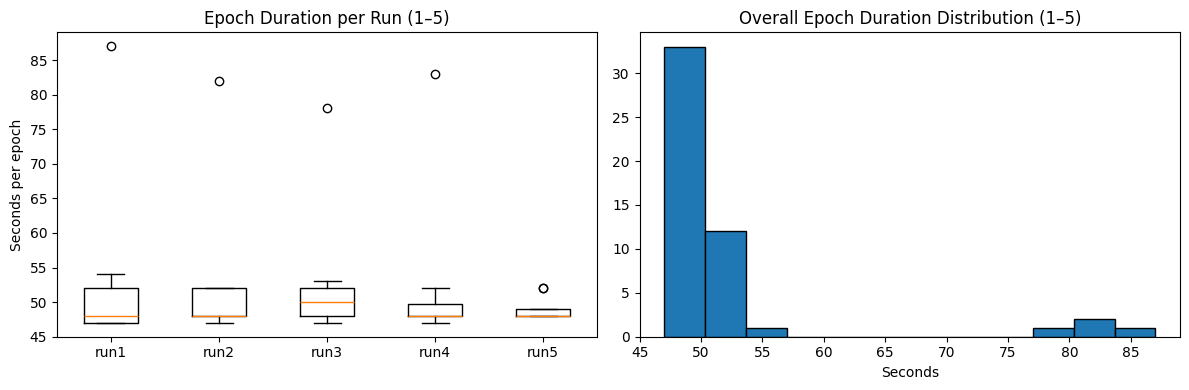

In [7]:
import matplotlib.pyplot as plt
# Timing plots
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
order = ['run1','run2','run3','run4','run5']
plt.boxplot([epoch_times[r] for r in order], labels=order, vert=True, showfliers=True)
plt.ylabel('Seconds per epoch')
plt.title('Epoch Duration per Run (1–5)')
plt.subplot(1,2,2)
plt.hist(df['seconds'], bins=12, edgecolor='black')
plt.xlabel('Seconds')
plt.title('Overall Epoch Duration Distribution (1–5)')
plt.tight_layout()
plt.show()

### Interpretation (Runs 1–5)
- Accuracy range: 99.70%–99.85%; mean ≈ 99.80%; very narrow spread (simplistic MLP + duplicated data).
- Epoch durations cluster 47–52s for majority; outliers: 78–87s appear in runs 1–4 causing elevated mean (~50–53s).
- Batch size 8 drives high iteration count (19,999 steps/epoch) and Python overhead; longer epochs likely due to memory allocator or transient contention.
- Early stopping around epoch 6 would remove most outlier impact with little accuracy trade-off.

## Recommendations (Focused on Runs 1–5)
1. Increase batch size (64–128) to reduce wall time per epoch drastically.
2. Introduce `tf.data` pipeline with `prefetch` to smooth CPU utilization spikes.
3. Apply early stopping (patience=2) to cut ~40% of training time.
4. Transition to small CNN to obtain robust features without relying on data duplication.
5. Track per-epoch images/sec after batch size change to quantify gains.